In [53]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os, sys
import h5py
import numpy as np
import scipy as sp
from astropy import constants as const
import matplotlib.pyplot as plt
import units as un
from readdata import *

import yt
from yt.funcs import mylog
mylog.setLevel(40)

%matplotlib notebook
%matplotlib inline

#Define the units
mbin = 3. #M_sun
abin = 50. #AU
u = un.units(mbin, abin)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2d data

In [2]:
level = 2

os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR2D")
prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
simulation2d = data2d(prim[::100], u, level)

#level=1

#os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR3Dlong")
#prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
#simulation3d = data3d(prim[-1:], u, level)

Initializing data readin
Read cbd.out1.00000.athdf
Read cbd.out1.00100.athdf
Read cbd.out1.00200.athdf
Read cbd.out1.00300.athdf
Read cbd.out1.00400.athdf
Read cbd.out1.00500.athdf
Read cbd.out1.00600.athdf
Read cbd.out1.00700.athdf
Read cbd.out1.00800.athdf
Read cbd.out1.00900.athdf
Read cbd.out1.01000.athdf
Processed all data


In [80]:
simulation2d.draw(simulation2d.rho, "_rho.png", lab="$\Sigma ~[g/cm^3]$", scale = 1./5)
simulation2d.draw(simulation2d.v3, "_vx.png", lab="$v_x ~[cm/s]$", scale = 1.)
simulation2d.draw(simulation2d.v2, "_vy.png", lab="$v_y ~[cm/s]$", scale = 1.)


#simulation2d.draw(simulation2d.press, "_press.png", lab="$P ~[g/(cm s^2)]$", scale = 1./2)
#simulation2d.draw(simulation2d.temp, "_temp.png", lab="$T ~[K]$", scale = 1./2)

Drew cbd.out1.00000.athdf
Drew cbd.out1.00100.athdf
Drew cbd.out1.00200.athdf
Drew cbd.out1.00300.athdf
Drew cbd.out1.00400.athdf
Drew cbd.out1.00500.athdf
Drew cbd.out1.00600.athdf
Drew cbd.out1.00700.athdf
Drew cbd.out1.00800.athdf
Drew cbd.out1.00900.athdf
Drew cbd.out1.01000.athdf
Drew cbd.out1.00000.athdf
Drew cbd.out1.00100.athdf
Drew cbd.out1.00200.athdf
Drew cbd.out1.00300.athdf
Drew cbd.out1.00400.athdf
Drew cbd.out1.00500.athdf
Drew cbd.out1.00600.athdf
Drew cbd.out1.00700.athdf
Drew cbd.out1.00800.athdf
Drew cbd.out1.00900.athdf
Drew cbd.out1.01000.athdf
Drew cbd.out1.00000.athdf
Drew cbd.out1.00100.athdf
Drew cbd.out1.00200.athdf
Drew cbd.out1.00300.athdf
Drew cbd.out1.00400.athdf
Drew cbd.out1.00500.athdf
Drew cbd.out1.00600.athdf
Drew cbd.out1.00700.athdf
Drew cbd.out1.00800.athdf
Drew cbd.out1.00900.athdf
Drew cbd.out1.01000.athdf


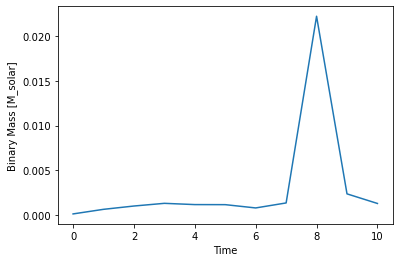

In [4]:
#all masses within 1 code unit = 50AU
m = masses(simulation2d.rho, rmax=1.)/u.msol
plt.plot(m)
plt.xlabel("Time")
plt.ylabel("Binary Mass [M_solar]")
plt.show()

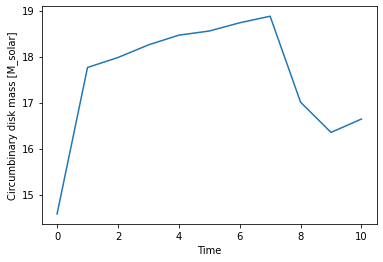

In [5]:
#all masses within 1 code unit = 50AU
m = masses(simulation2d.rho, rmin=1.)/u.msol
plt.plot(m)
plt.xlabel("Time")
plt.ylabel("Circumbinary disk mass [M_solar]")
plt.show()

50.0
(11, 1024, 1024)


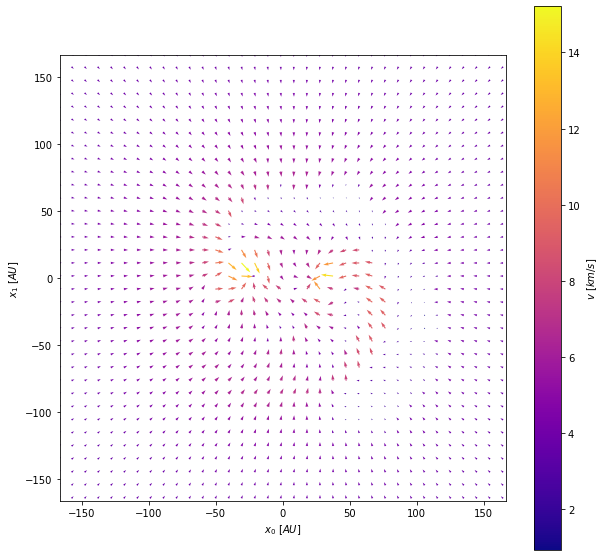

In [79]:
frame = u.abin*10.
lim = frame*1./3
lab = "$v~[km/s]$"

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

coord = coordinates(simulation2d.rho[0], 500)
print(u.abin)

step = 10

v = np.sqrt(simulation2d.v1**2 + simulation2d.v2**2)

print(np.shape(v))

pos = ax.quiver(coord.x[::step, ::step],coord.y[::step, ::step],\
          simulation2d.v1[-1][::step, ::step],simulation2d.v2[-1][::step, ::step], v[-1][::step, ::step],\
         cmap="plasma")
fig.colorbar(pos, ax=ax, label=lab)


ax.set_aspect('equal', 'box')
ax.set_xlabel("$x_0~[AU]$")
ax.set_ylabel("$x_1~[AU]$")
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

plt.show()

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] [[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]]


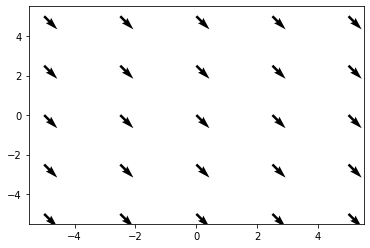

In [46]:
x,y = np.meshgrid(np.linspace(-5,5,5),np.linspace(-5,5,5))

u = np.ones((5,5))
v = -np.ones((5,5))

print(u[::2,::2],v)

plt.quiver(x,y,u,v)
plt.show()

## 3d data

In [ ]:
level=2

os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR3Dllong")
prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
simulation3d = data3d(prim[6:], u, level)

Initializing data readin
Read cbd.out1.00006.athdf
Read cbd.out1.00007.athdf
Read cbd.out1.00008.athdf
Read cbd.out1.00009.athdf
Read cbd.out1.00010.athdf


In [ ]:
#simulation3d.plot3d(simulation3d.temp, "_rho.png", lab="$\Sigma ~[g/cm^3]$")
simulation3d.column(simulation3d.rho, np.mean, "_rho.png", lab="$\Sigma ~[g/cm^3]$", scale = 1./1)
simulation3d.column(simulation3d.temp, np.max, "_temp.png", lab="$T ~[K]$", scale = 1./1)

In [ ]:
print(np.shape(sim))

NameError: name 'codelength' is not defined